In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [14]:
# Parameters

a_n = 1
a_e = 6
N_n = 1
N_e = 2
b_nn = 1
b_en = 2
b_ne = .5
b_ee = .5
m_n = .1
m_e = .1
k_n = .1
k_e = .05
sigma = 1
gamma_n = 1
gamma_e = 1
c = 2.25

H = 0.5
delta = .1

In [15]:
def f(x, t):
    """ Function f for dx/dt = f(x,t) in the five-dimensional model.
    x[0]: Native plant mass
    x[1]: Exotic plant mass
    x[2]: Native plant litter
    x[3]: Exotic plant litter
    x[4]: Soil nitrogen content"""
    f_1 = (a_n * (x[4] - N_n) - b_nn * x[2] - b_en * x[3]) * x[0]
    f_2 = (a_e * (x[4] - N_e) - b_ee * x[3] - b_ne * x[2]) * x[1]

    return (
        f_1 - m_n * x[0],
        f_2 - m_e * x[1],
        m_n * x[0] - k_n * x[2],
        m_e * x[1] - k_e * x[3],
        c - sigma * x[4] + gamma_n * (-f_1 + k_n * x[2]) + gamma_e * (-f_2 + k_e * x[3])
    )

In [16]:
def flow(f, x_0, t_0, tau, dt = 0.1):
    """ Returns the flow at points in ts, xs. 
        * ts is a vector indicating the times at which the flow is evaluated.
        * xs is a two-dimensional array of shape (len(ts), 5).
        Each column represents a different state variable.
        Each row respresents the state variables at different times. 
        dt is """
    ts = np.arange(t_0, t_0 + tau, dt)
    xs = odeint(f, x_0, ts)
    return (ts, xs)

In [17]:
def kick(X):
    """ Returns a vector representing the kick applied to a current state X."""
    const = -H / (delta * (X[0] + X[1]) + X[2] + X[3])
    kick_vector = np.array([
        const * delta * X[0],
        const * delta * X[1],
        const * X[2],
        const * X[3],
        0
    ])
    return kick_vector

In [18]:
def flow_and_kick(f, x_0, t_0, tau, T, dt=0.01):
    """ Returns t,x pair of the flow-kick simulation.
        tau is the time span between flow kicks
        T is the total simulation timespan. """
    ts, xs = flow(f, x_0, t_0, tau)
    num_kicks = int(T/tau)
    for i in range(num_kicks):
        xs[-1] = xs[-1] + kick(xs[-1])
        ts = np.append(ts,flow(f, xs[-1], ts[-1], tau)[0])
        temp = flow(f, xs[-1], ts[-1], tau)[1]
        xs = np.append(xs,temp)
        xs = np.reshape(xs, (np.size(ts),5))
    # Flow for the remaining timespan.
    new_tau = T-tau*num_kicks
    ts = np.append(ts, flow(f, xs[-1], ts[-1], new_tau)[0])
    xs = np.append(xs, flow(f, xs[-1], ts[-1], new_tau)[1])
    xs = np.reshape(xs, (np.size(ts),5))
    
    return (ts,xs)

## Plotting functions

In [19]:
def time_plot(ts, xs, variable = 0, directory = None):
    """ Plots time series values for a specified state variable (default is x[0])
        variable is the coordinate number of the variable of interests"""
    plt.clf()
    fig = plt.figure();
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]);
    ax.plot(ts, xs[:,variable]);
    plt.show()

In [20]:
def all_time_plot(ts, xs, directory = None):
    """ Plots time series plots for each state variable. """
    plt.clf()
    dim = np.shape(xs)[1] # Dimension of state vector
    fig = plt.figure();
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]);
    colorvec = ['g', 'r', 'b', 'm', 'k']
    for i in range(dim):
        ax.plot(ts, xs[:,i], color = colorvec[i]);
    plt.show()

In [21]:
def phase_plot(xs, var_1, var_2):
    """ given the values of xs, plots two of the variables 
        against each other (phase portrait) 
        var_1: coordinate of x_axis variable
        var_2: coordinate of y_axis variable """
    plt.clf()
    fig = plt.figure();
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]);
    # Plot the initial point as a square
    ax.plot(xs[0, var_1], xs[0, var_2], marker = 's');
    ax.plot(xs[:, var_1], xs[:, var_2]);
    ax.plot(xs[-1, var_1], xs[-1, var_2], marker = '*');
    #ax.set_xlim((0,1))
    #ax.set_xlim((0,1))
    plt.show()

In [22]:
x_0 = (.2, .5, .1, 0, 2.25)
t_0 = 0
tau = 3
T = 100
ts, xs = flow_and_kick(f, x_0, t_0, tau, T)

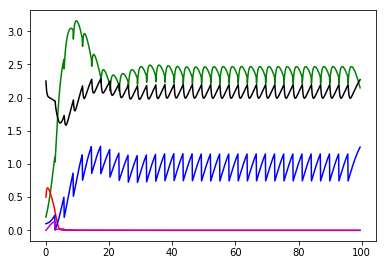

In [23]:
all_time_plot(ts, xs)

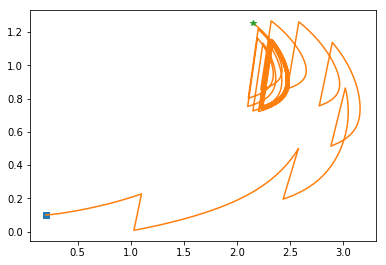

In [24]:
phase_plot(xs,0,2)